# Scrape Nike discount products
https://www.nike.com.hk/running/apparel/list.htm?intpromo=PNTP

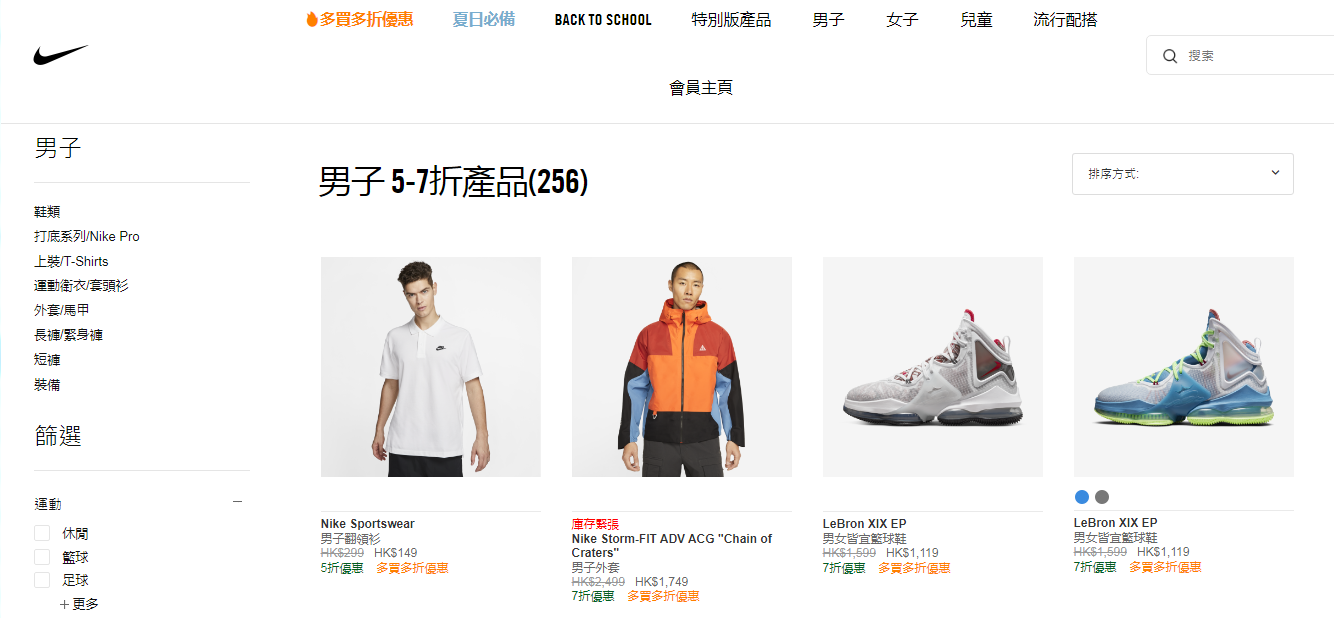

In [1]:
# pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libaries
import pandas as pd
import numpy as np
import plotly.express as px
import requests
from bs4 import BeautifulSoup as bs

## Get the website and view the source

In [3]:
nike_rss = requests.get("https://www.nike.com.hk/running/apparel/list.htm?intpromo=PNTP")
nike_bs = bs(nike_rss.content,'html.parser')
#nike_bs

In [4]:
nike_bs
#html code

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<link href="https://www.nike.com.hk" rel="dns-prefetch"/>
<link href="https://img.nike.com.hk" rel="dns-prefetch"/>
<link href="" rel="canonical"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://static.nike.com.hk/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="Nike香港官方網上商店NIKE.COM, Nike, 官方產店, 網上購物, 運動, 男子, 女子, 兒童, Nike Sportswear, 籃球, Jordan，跑步, 足球, 女子訓練, 男子訓練，高爾夫, air max, free, flyknit, 鞋類, 服裝, 裝備. Nike香港官方網上商店NIKE.COM" name="keywords">
<meta content="前往 Nike.com 尋找跑步服裝。 退貨一律免費。" name="description"/>
<title>Nike 跑步服裝 | Nike香港官方商店</title>
<script type="text/javascript">

	var domain_image=

## Locate the product contents

In [5]:
nike_bs_prod = nike_bs.findAll('dl', {"class":"product_list_content"})
#nike_bs_prod

/var/folders/zb/1vtwn9rj08lghdmmhfhb0d280000gn/T/ipykernel_78650/419979918.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  nike_bs_prod = nike_bs.findAll('dl', {"class":"product_list_content"})


In [6]:
nike_bs_prod

[<dl class="product_list_content" code="IF2029-010" pdpurl="/product/IF2029-010/detail.htm?pdpRecommend=false&amp;preSkuCode=">
 <dt class="pro_hover_larim0 skul_spic">
 <a href="/product/IF2029-010/detail.htm?pdpRecommend=false&amp;preSkuCode=" name="pdpAid" target="_blank">
 <img lazy_src="https://static.nike.com.hk/resources/product/IF2029-010/IF2029-010_M1.png"/>
 </a>
 </dt>
 <dd class="overflow pd-top12">
 <ul class="new-sublist-all fLeft">
 <li class="new-color-a-Black"></li>
 <li class="new-color-a-Red"></li>
 </ul>
 </dd>
 <dd class="product-mark"><span style="color: #ff0000">新品上架</span></dd>
 <dd><a class="product_list_name" href="/product/IF2029-010/detail.htm?pdpRecommend=false&amp;preSkuCode=" name="pdpAid"><span class="up">Nike Retro</span><br/><span class="down">Dri-FIT 男子運動外套</span></a></dd>
 <dd class="color666" id="oriPrice" rank="129.1">HK$799</dd>
 <dd class="padding-none price-discount">
 <span class="product-discount" style="color: "></span>
 <span class="product-

## Collect the product name, product description, origial price, and discounted price

In [8]:
for item in nike_bs_prod:
    print(item)
    break

<dl class="product_list_content" code="IF2029-010" pdpurl="/product/IF2029-010/detail.htm?pdpRecommend=false&amp;preSkuCode=">
<dt class="pro_hover_larim0 skul_spic">
<a href="/product/IF2029-010/detail.htm?pdpRecommend=false&amp;preSkuCode=" name="pdpAid" target="_blank">
<img lazy_src="https://static.nike.com.hk/resources/product/IF2029-010/IF2029-010_M1.png"/>
</a>
</dt>
<dd class="overflow pd-top12">
<ul class="new-sublist-all fLeft">
<li class="new-color-a-Black"></li>
<li class="new-color-a-Red"></li>
</ul>
</dd>
<dd class="product-mark"><span style="color: #ff0000">新品上架</span></dd>
<dd><a class="product_list_name" href="/product/IF2029-010/detail.htm?pdpRecommend=false&amp;preSkuCode=" name="pdpAid"><span class="up">Nike Retro</span><br/><span class="down">Dri-FIT 男子運動外套</span></a></dd>
<dd class="color666" id="oriPrice" rank="129.1">HK$799</dd>
<dd class="padding-none price-discount">
<span class="product-discount" style="color: "></span>
<span class="product-activity" style="c

In [9]:
product_name, product_description, product_orgPrice, product_disPrice, image =[],[],[],[],[]

for item in nike_bs_prod:
    try:

        name = item.findAll('span',{"class": "up"})[0].text
        description = item.findAll('span',{"class": "down"})[0].text
        try: 
            lazy_src = item.findAll('img')[0]["lazy_src"]  #"lazy_src"
        except:
            lazy_src = 'N/A'
        try: 
            orgPrice = item.findAll('span',{"class": "origin_price"})[0].text.split("HK$",2)[-1]
        except:
            orgPrice = np.nan
            
        disPrice = item.findAll('dd',{"class": "color666"})[0].text.split("HK$",2)[-1]
        
        print(name)
        product_name.append(name)

        print(description)
        product_description.append(description)

        print(orgPrice)
        product_orgPrice.append(orgPrice)

        print(disPrice)
        product_disPrice.append(disPrice)
        
        print(lazy_src)
        image.append(lazy_src)
    except:
        print("Some items cannot be parsed")


Nike Retro
Dri-FIT 男子運動外套
nan
799
https://static.nike.com.hk/resources/product/IF2029-010/IF2029-010_M1.png
Nike Retro
Dri-FIT 男子運動長褲
nan
649
https://static.nike.com.hk/resources/product/IF2033-010/IF2033-010_M1.png
Nike Swift
Dri-FIT 女子防曬跑步上衣
nan
499
https://static.nike.com.hk/resources/product/HQ0500-502/HQ0500-502_M1.png
Nike Swift
Dri-FIT 女子防曬跑步上衣
499
399
https://static.nike.com.hk/resources/product/HQ0500-499/HQ0500-499_M1.png
Nike Swift
Dri-FIT 女子中腰跑步長褲
nan
649
https://static.nike.com.hk/resources/product/HV6089-010/HV6089-010_M1.png
Nike Running Division
男子隔水跑步外套
1,099
989
https://static.nike.com.hk/resources/product/IM9662-289/IM9662-289_M1.png
Nike Second Sunrise
Dri-FIT ADV 男子跑步短褲
499
449
https://static.nike.com.hk/resources/product/IM9669-060/IM9669-060_M1.png
Nike Swift
Repel 女子收納式跑步外套
nan
699
https://static.nike.com.hk/resources/product/HQ0651-897/HQ0651-897_M1.png
Nike Stride 馬年限定脫韁系列
Dri-FIT 新年款男子跑步上衣
nan
549
https://static.nike.com.hk/resources/product/IQ3818-613/IQ3818

/var/folders/zb/1vtwn9rj08lghdmmhfhb0d280000gn/T/ipykernel_78650/999001058.py:6: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  name = item.findAll('span',{"class": "up"})[0].text
/var/folders/zb/1vtwn9rj08lghdmmhfhb0d280000gn/T/ipykernel_78650/999001058.py:7: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  description = item.findAll('span',{"class": "down"})[0].text
/var/folders/zb/1vtwn9rj08lghdmmhfhb0d280000gn/T/ipykernel_78650/999001058.py:9: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  lazy_src = item.findAll('img')[0]["lazy_src"]  #"lazy_src"
/var/folders/zb/1vtwn9rj08lghdmmhfhb0d280000gn/T/ipykernel_78650/999001058.py:13: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  orgPrice = item.findAll('span',{"class": "o

## Save data into a dataframe

In [7]:
prod_dict ={
    'name':product_name,
    'description':product_description,
    "orig price":product_orgPrice,
    "discount price":product_disPrice,
    "image":image
}

df_prod = pd.DataFrame(data=prod_dict)
df_prod['orig price'] = df_prod['orig price'].fillna(df_prod['discount price'])
df_prod['orig price'] = df_prod['orig price'].str.replace(',', '').astype(int)
df_prod['discount price'] = df_prod['discount price'].str.replace(',', '').astype(int)
df_prod

,name,description,orig price,discount price,image
0,Nike AeroSwift,Dri-FIT ADV 男子跑步背心,549,549,https://static.nike.com.hk/resources/product/F...
1,Nike Stride,Dri-FIT 男子二合一跑步短褲,349,349,https://static.nike.com.hk/resources/product/F...
2,Nike Stride,Dri-FIT ADV 男子跑步背心,349,349,https://static.nike.com.hk/resources/product/H...
3,Nike Challenger,Dri-FIT 男子跑步短褲,299,239,https://static.nike.com.hk/resources/product/H...
4,Nike,男子跑步T恤,259,259,https://static.nike.com.hk/resources/product/H...
5,Nike AeroSwift,Dri-FIT ADV 男子跑步短褲,499,499,https://static.nike.com.hk/resources/product/F...
6,Nike Dri-FIT Miler,男子跑步背心,229,229,https://static.nike.com.hk/resources/product/D...
7,Nike Challenger Run Energy,Dri-FIT 男子跑步短褲,299,299,https://static.nike.com.hk/resources/product/H...
8,Nike Dri-FIT Stride,男子二合一跑步短褲,349,319,https://static.nike.com.hk/resources/product/D...
9,Nike Solar Chase,Dri-FIT ADV 男子跑步背心,449,449,https://static.nike.com.hk/resources/product/H...


In [8]:
from IPython.core.display import HTML
df_prod_img = df_prod
df_prod_img['image'] = df_prod_img['image'].apply(lambda x: f"<img src='{x}' width='50' >")

In [9]:
HTML(df_prod_img.to_html(escape=False))

,name,description,orig price,discount price,image
0,Nike AeroSwift,Dri-FIT ADV 男子跑步背心,549,549,
1,Nike Stride,Dri-FIT 男子二合一跑步短褲,349,349,
2,Nike Stride,Dri-FIT ADV 男子跑步背心,349,349,
3,Nike Challenger,Dri-FIT 男子跑步短褲,299,239,
4,Nike,男子跑步T恤,259,259,
5,Nike AeroSwift,Dri-FIT ADV 男子跑步短褲,499,499,
6,Nike Dri-FIT Miler,男子跑步背心,229,229,
7,Nike Challenger Run Energy,Dri-FIT 男子跑步短褲,299,299,
8,Nike Dri-FIT Stride,男子二合一跑步短褲,349,319,
9,Nike Solar Chase,Dri-FIT ADV 男子跑步背心,449,449,


## Calculate the discount %

In [10]:
df_prod['discount %'] = ((df_prod['orig price'] - df_prod['discount price']) / df_prod['orig price']) * 100
df_prod['discount %'] = df_prod['discount %'].round(0)
df_prod

,name,description,orig price,discount price,image,discount %
0,Nike AeroSwift,Dri-FIT ADV 男子跑步背心,549,549,<img src='https://static.nike.com.hk/resources...,0.0
1,Nike Stride,Dri-FIT 男子二合一跑步短褲,349,349,<img src='https://static.nike.com.hk/resources...,0.0
2,Nike Stride,Dri-FIT ADV 男子跑步背心,349,349,<img src='https://static.nike.com.hk/resources...,0.0
3,Nike Challenger,Dri-FIT 男子跑步短褲,299,239,<img src='https://static.nike.com.hk/resources...,20.0
4,Nike,男子跑步T恤,259,259,<img src='https://static.nike.com.hk/resources...,0.0
5,Nike AeroSwift,Dri-FIT ADV 男子跑步短褲,499,499,<img src='https://static.nike.com.hk/resources...,0.0
6,Nike Dri-FIT Miler,男子跑步背心,229,229,<img src='https://static.nike.com.hk/resources...,0.0
7,Nike Challenger Run Energy,Dri-FIT 男子跑步短褲,299,299,<img src='https://static.nike.com.hk/resources...,0.0
8,Nike Dri-FIT Stride,男子二合一跑步短褲,349,319,<img src='https://static.nike.com.hk/resources...,9.0
9,Nike Solar Chase,Dri-FIT ADV 男子跑步背心,449,449,<img src='https://static.nike.com.hk/resources...,0.0


In [11]:
productCount = df_prod[['description', 'name']].groupby(['description']).count().reset_index()
productCount.rename(columns={'name' : 'count'}, inplace=True)

In [12]:
productCount

,description,count
0,7/8 女子中腰跑步長褲,1
1,7/8 女子高腰連口袋跑步緊身褲,1
2,Dri-FIT 男子跑步短褲,1
3,Dri-FIT ADV 女子中腰跑步短褲,1
4,Dri-FIT ADV 女子短款跑步背心上衣,1
5,Dri-FIT ADV 女子跑步背心,1
6,Dri-FIT ADV 男子短袖跑步上衣,3
7,Dri-FIT ADV 男子跑步短褲,1
8,Dri-FIT ADV 男子跑步緊身短褲,3
9,Dri-FIT ADV 男子跑步背心,5


## Plot an interactive pie chart

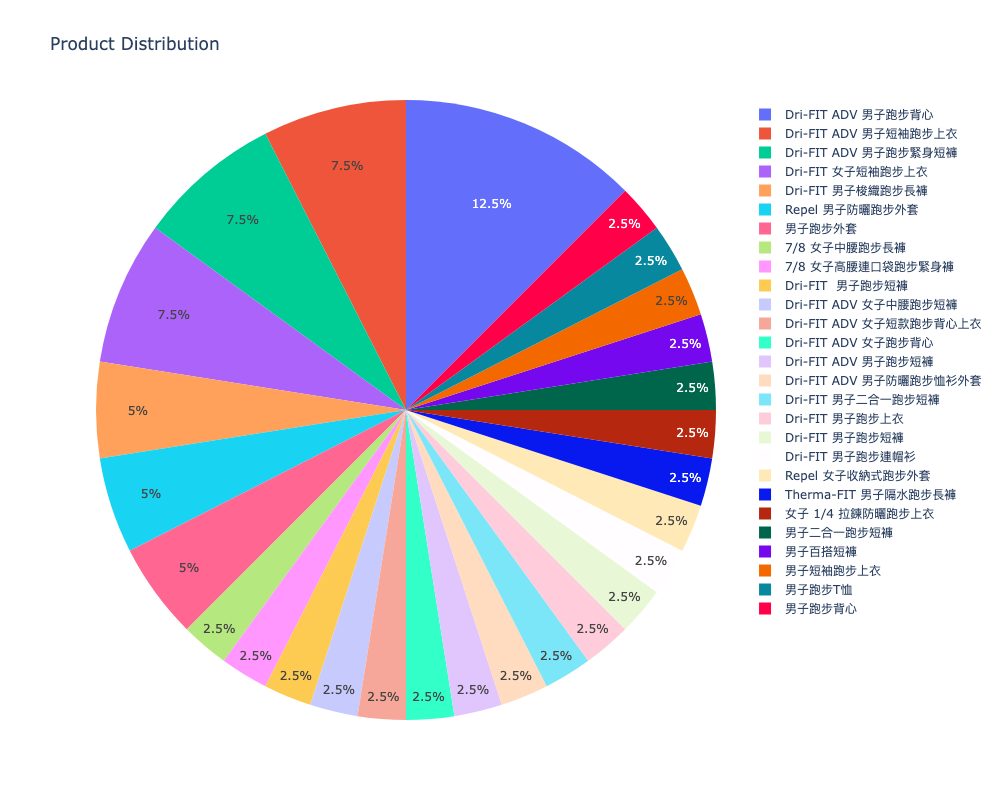

In [17]:
fig = px.pie(productCount, values='count', names='description', title='Product Distribution', width=800, height=800)
fig.show()

## Save the data in Excel format for downloading

In [14]:
#!pip install xlwt 

In [15]:
#df_prod.to_csv('nikeDiscountProducts.csv', index=False, encoding="utf_8_sig")